# Proyecto IA II: Reconocimiento facial


## Obligatorio

In [1]:
#@title **Importar las librerías que se usarán**
import os
import gc
import cv2
import numpy as np
import random
import pandas as pd
import urllib.request
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint, History
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Establecer el crecimiento de la GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
#@title Mount the Drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA-2-2023-1/Proyecto')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IA-2-2023-1/Proyecto


In [3]:
#@title Funciones Plot
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(200, 200,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

## Sección en Jupyter

Primero se establecieron algunas rutas:

```
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
```

*   "POS_PATH" Es la ruta al directorio llamado "positive" dentro de la carpeta "data".
*   "NEG_PATH" Es la ruta al directorio llamado "negative" dentro de la carpeta "data".

Luego, se utilizó la función os.makedirs() para crear los directorios:


```
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)

```

Después de configurar las rutas de acceso y crear los directorios se quería mover las imágenes desde una carpeta llamada "lfw" a la carpeta "negative" pero las imágenes de cada persona estaban en una carpeta individual.



```
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)
```

El bucle exterior for itera sobre los elementos dentro de la carpeta "lfw".
Luego, el bucle interior for itera sobre los archivos dentro de cada directorio de "lfw".

Dentro del bucle, se crean dos rutas de acceso utilizando las variables establecidas anteriormente. EX_PATH representa la ruta de acceso al archivo actual que se está iterando en la carpeta "lfw", mientras que NEW_PATH representa la ruta de acceso a la nueva ubicación del archivo en la carpeta "negative".

Finalmente se utilizó la función os.replace() para mover el archivo desde EX_PATH a NEW_PATH, lo que efectivamente lo traslada de la carpeta "lfw" a la carpeta "negative".


#Pre procesamiento de imágenes

Ajuste de tamaños, normalización

## Ajuste de tamaños

In [4]:
#@title Ajuste tamaños 200x200px Imágenes Valentina

POS_PATH = os.path.join('data', 'Valentina')

for filename in os.listdir(POS_PATH):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(POS_PATH, filename)
        image = cv2.imread(img_path)
        if image.ndim == 2:  # Imagen en blanco y negro
            resized_image = cv2.resize(image, (200, 200))
            resized_image = np.expand_dims(resized_image, axis=-1)  # Como algunas están en blanco y negro entonces se debe agregar un canal extra
        else:  # Imagen con tres canales (RGB)
            resized_image = cv2.resize(image, (200, 200))
        cv2.imwrite(img_path, resized_image)

In [5]:
#@title Ajuste tamaños 200x200px Imágenes Jose

POS_PATH = os.path.join('data', 'Jose_Carrillo')

for filename in os.listdir(POS_PATH):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(POS_PATH, filename)
        image = cv2.imread(img_path)
        if image.ndim == 2:  # Imagen en blanco y negro
            resized_image = cv2.resize(image, (200, 200))
            resized_image = np.expand_dims(resized_image, axis=-1)  # Como algunas están en blanco y negro entonces se debe agregar un canal extra
        else:  # Imagen con tres canales (RGB)
            resized_image = cv2.resize(image, (200, 200))
        cv2.imwrite(img_path, resized_image)

In [6]:
#@title Ajuste tamaños 200x200px Imágenes Ivan

POS_PATH = os.path.join('data', 'Ivan')

for filename in os.listdir(POS_PATH):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(POS_PATH, filename)
        image = cv2.imread(img_path)
        if image.ndim == 2:  # Imagen en blanco y negro
            resized_image = cv2.resize(image, (200, 200))
            resized_image = np.expand_dims(resized_image, axis=-1)  # Como algunas están en blanco y negro entonces se debe agregar un canal extra
        else:  # Imagen con tres canales (RGB)
            resized_image = cv2.resize(image, (200, 200))
        cv2.imwrite(img_path, resized_image)

In [7]:
#@title Ajuste tamaños 200x200px Imágenes de entrenamiento

NEG_PATH = os.path.join('data', 'otro')

for filename in os.listdir(NEG_PATH):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(NEG_PATH, filename)
        image = cv2.imread(img_path)
        resized_image = cv2.resize(image, (200, 200))
        cv2.imwrite(img_path, resized_image)

## Creación ruta de carpetas

In [8]:
#@title OBLIGATORIO
# Rutas de las carpetas
folderValen = 'data/Valentina'
folderJose = 'data/Jose_Carrillo'
folderIvan = 'data/Ivan'
folderOthers = 'data/otro'

In [9]:
#@title OBLIGATORIO
                                                                            #Creaciones de listas

# Crear la lista de archivos de "positive"
valen_files = [filename for filename in os.listdir(folderValen) if filename.endswith('.jpg') or filename.endswith('.png')]
jose_files = [filename for filename in os.listdir(folderJose) if filename.endswith('.jpg') or filename.endswith('.png')]
ivan_files = [filename for filename in os.listdir(folderIvan) if filename.endswith('.jpg') or filename.endswith('.png')]

# Crear la lista de archivos de "negative"
others_files = [filename for filename in os.listdir(folderOthers) if filename.endswith('.jpg') or filename.endswith('.png')]

# Lista para almacenar todas las imágenes
all_images = []

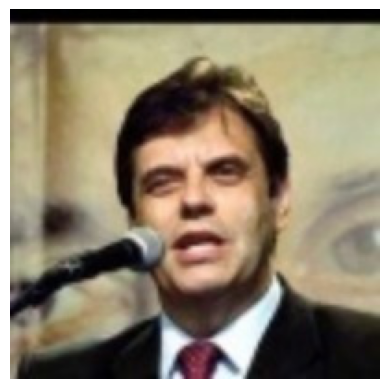

In [10]:
#@title Mostrar imágen al azar de la carpeta de "otro"

random_image_file = random.choice(others_files)
image_path = os.path.join(folderOthers, random_image_file)

# Leer la imagen y mostrarla
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

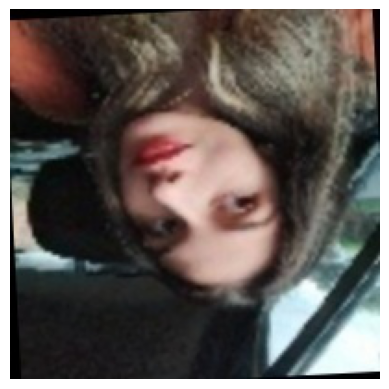

In [11]:
#@title Mostrar imágen al azar de la carpeta de "Valen"

random_image_file = random.choice(valen_files)
image_path = os.path.join(folderValen, random_image_file)

# Leer la imagen y mostrarla
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

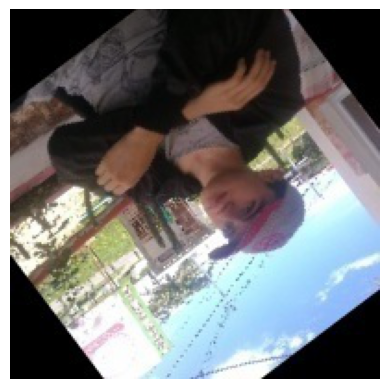

In [12]:
#@title Mostrar imágen al azar de la carpeta de "Valen"

random_image_file = random.choice(jose_files)
image_path = os.path.join(folderJose, random_image_file)

# Leer la imagen y mostrarla
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

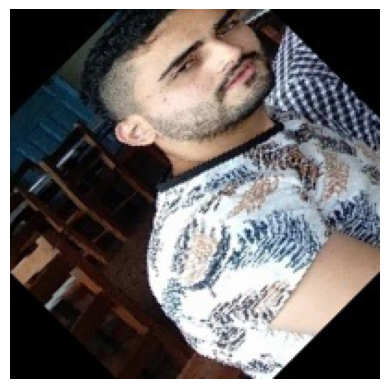

In [13]:
#@title Mostrar imágen al azar de la carpeta de "Valen"

random_image_file = random.choice(ivan_files)
image_path = os.path.join(folderIvan, random_image_file)

# Leer la imagen y mostrarla
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

#Entrenamiento

In [14]:

# Crear listas para almacenar las imágenes y etiquetas
images = []
labels = []

# Asignar la etiqueta positiva
for valen_file in valen_files:
    image_path = os.path.join(folderValen, valen_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    labels.append(1)  # Etiqueta positiva para imágenes de Valen

for jose_file in jose_files:
    image_path = os.path.join(folderJose, jose_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    labels.append(2)  # Etiqueta positiva para imágenes de Jose
count_i=0
for ivan_file in ivan_files:
    if count_i == 150:
      break
    image_path = os.path.join(folderIvan, ivan_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    labels.append(3)  # Etiqueta positiva para imágenes de Ivan
    count_i += 1

# Asignar la etiqueta negativa
for others_file in others_files:
    image_path = os.path.join(folderOthers, others_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    labels.append(0)  # Etiqueta negativa para imágenes de otras personas


In [15]:
#
labels = tf.keras.utils.to_categorical(labels)
# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convertir las listas de imágenes y etiquetas a arrays numpy
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [16]:

# Construir el modelo de CNN
model = Sequential()
model.add(Conv2D(16, (2, 2), padding='same', input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Cambio en la capa de salida para tener 4 clases
model.add(Dense(4, activation='softmax'))


# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 66, 66, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        1

In [17]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/50
8/8 [==============================] - 16s 2s/step - loss: 34.7831 - accuracy: 0.2724 - val_loss: 2.7797 - val_accuracy: 0.2581
Epoch 2/50
8/8 [==============================] - 14s 2s/step - loss: 3.3848 - accuracy: 0.2419 - val_loss: 1.5363 - val_accuracy: 0.3145
Epoch 3/50
8/8 [==============================] - 14s 2s/step - loss: 1.7047 - accuracy: 0.2988 - val_loss: 1.3335 - val_accuracy: 0.3710
Epoch 4/50
8/8 [==============================] - 14s 2s/step - loss: 1.4399 - accuracy: 0.3496 - val_loss: 1.3041 - val_accuracy: 0.4919
Epoch 5/50
8/8 [==============================] - 15s 2s/step - loss: 1.3403 - accuracy: 0.3943 - val_loss: 1.2861 - val_accuracy: 0.4194
Epoch 6/50
8/8 [==============================] - 19s 2s/step - loss: 1.3191 - accuracy: 0.3963 - val_loss: 1.2618 - val_accuracy: 0.5242
Epoch 7/50
8/8 [==============================] - 13s 2s/step - loss: 1.2570 - accuracy: 0.4431 - val_loss: 1.2311 - val_accuracy: 0.5484
Epoch 8/50
8/8 [=================

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

4/4 [==============================] - 1s 244ms/step - loss: 0.3436 - accuracy: 0.8710
Test accuracy: 0.8709677457809448


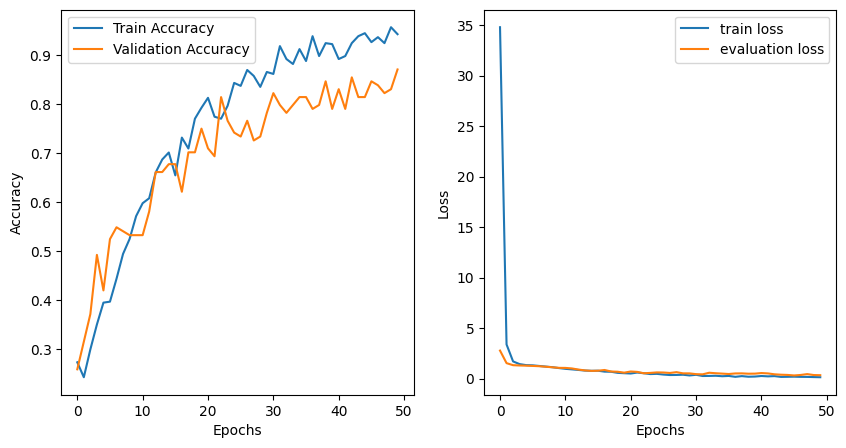

In [20]:
#@title **Coding**. Gráficos
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

4/4 [==============================] - 2s 393ms/step
Predicted valie: 1  Class:  Valen
Max prob:  0.85205007 Ground truth:  Valen
(124, 4)


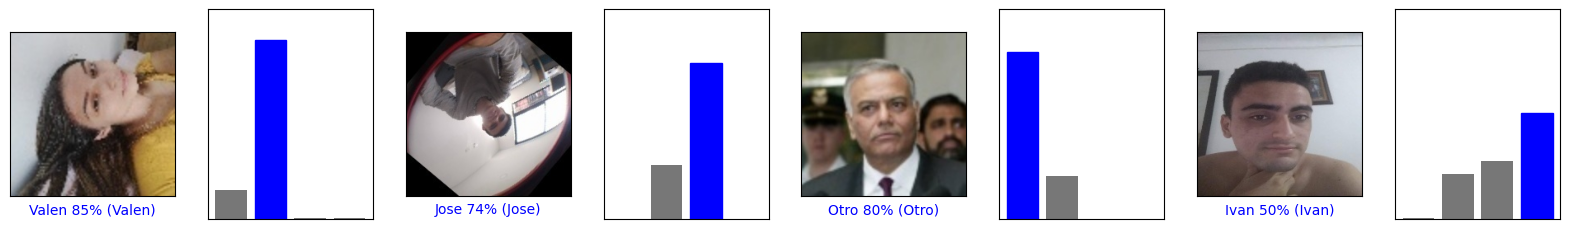

In [38]:
index_vector1 =  8 #@param {type:"integer"}
index_vector2 =  34 #@param {type:"integer"}
index_vector3 =  64 #@param {type:"integer"}
index_vector4 =  89 #@param {type:"integer"}
class_names = ["Otro","Valen","Jose","Ivan"]
# Why do we use the predict and not the evaluate here?
predictions = model.predict(test_images)

# Look at the predicted value for one sample
print ("Predicted valie:",  np.argmax(predictions[index_vector1]), " Class: ", class_names[np.argmax(predictions[index_vector1])])
print ("Max prob: ", np.max(predictions[index_vector1]), "Ground truth: ", class_names[np.argmax(test_labels ,axis=1)[index_vector1]])

print(predictions.shape)
plt.figure(figsize=(20,6))
plt.subplot(2,8,1)
plot_image(index_vector1, predictions, np.argmax(test_labels ,axis=1), test_images)
plt.subplot(2,8,2)
plot_value_array(index_vector1, predictions,  np.argmax(test_labels ,axis=1))
plt.subplot(2,8,3)
plot_image(index_vector2, predictions, np.argmax(test_labels ,axis=1), test_images)
plt.subplot(2,8,4)
plot_value_array(index_vector2, predictions,  np.argmax(test_labels ,axis=1))
plt.subplot(2,8,5)
plot_image(index_vector3, predictions, np.argmax(test_labels ,axis=1), test_images)
plt.subplot(2,8,6)
plot_value_array(index_vector3, predictions,  np.argmax(test_labels ,axis=1))
plt.subplot(2,8,7)
plot_image(index_vector4, predictions, np.argmax(test_labels ,axis=1), test_images)
plt.subplot(2,8,8)
plot_value_array(index_vector4, predictions,  np.argmax(test_labels ,axis=1))

4/4 [==============================] - 2s 449ms/step


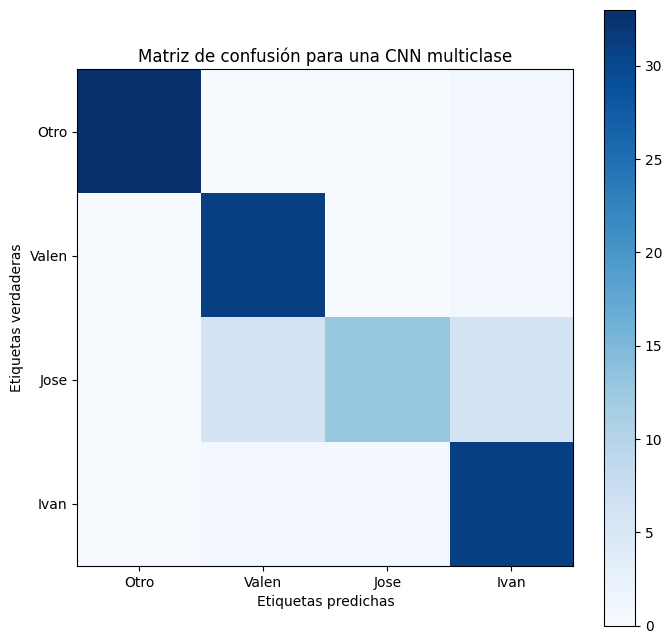

In [22]:
# Obtener las etiquetas predichas por el modelo
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)

# Obtener las etiquetas verdaderas
true_labels = np.argmax(test_labels, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(true_labels, pred_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap='Blues')
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.xticks([0, 1, 2, 3], class_names)
plt.yticks([0, 1, 2, 3], class_names)
plt.title('Matriz de confusión para una CNN multiclase')
plt.colorbar()
plt.show()